# Data 

In [1]:
import pandas as pd
from traitlets.traitlets import TraitType
import datetime
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import os

from tqdm import tqdm

import urllib.request
import zipfile
import random
import itertools
import math
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_parquet('Preprocessed_data/eda_yellow_tripdata_2019-01-02.parquet')
df["pickup_minute"] = df["tpep_pickup_datetime"].dt.minute
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,pickup_hour,pickup_month,DayofWeek,pickup_minute,pickup_day
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,151,239,0,1,1,46,1
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,239,246,0,1,1,59,1
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,163,229,0,1,1,21,1
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,229,7,0,1,1,32,1
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,141,234,0,1,1,57,1
...,...,...,...,...,...,...,...,...,...,...,...
14249848,2019-02-28 23:29:14,2019-02-28 23:45:11,1.0,2.86,68,140,23,2,3,29,28
14249849,2019-02-28 23:11:03,2019-02-28 23:17:14,1.0,1.22,48,143,23,2,3,11,28
14249850,2019-02-28 23:18:52,2019-02-28 23:29:29,2.0,1.75,48,162,23,2,3,18,28
14249851,2019-02-28 23:34:45,2019-02-28 23:42:11,1.0,1.57,141,237,23,2,3,34,28


In [4]:
df[(df.pickup_month == 1) & (df.pickup_day == 29) & (df.pickup_hour == 16) & (df.pickup_minute < 30)]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,pickup_hour,pickup_month,DayofWeek,pickup_minute,pickup_day
6779839,2019-01-29 16:00:59,2019-01-29 16:24:26,1.0,1.85,241,127,16,1,1,0,29
6780216,2019-01-29 16:01:46,2019-01-29 16:19:09,2.0,5.02,142,244,16,1,1,1,29
6780454,2019-01-29 16:00:10,2019-01-29 16:52:44,3.0,18.05,61,156,16,1,1,0,29
6780779,2019-01-29 16:01:28,2019-01-29 16:05:32,1.0,0.89,264,264,16,1,1,1,29
6780878,2019-01-29 16:08:39,2019-01-29 16:14:27,1.0,0.72,113,249,16,1,1,8,29
...,...,...,...,...,...,...,...,...,...,...,...
6896594,2019-01-29 16:07:27,2019-01-29 16:18:02,2.0,1.95,164,68,16,1,1,7,29
6896595,2019-01-29 16:26:37,2019-01-29 16:36:35,1.0,1.22,186,246,16,1,1,26,29
6901850,2019-01-29 16:02:53,2019-01-29 16:04:41,1.0,0.51,48,246,16,1,1,2,29
6901851,2019-01-29 16:15:07,2019-01-29 16:19:38,1.0,0.97,50,246,16,1,1,15,29


In [5]:
df.tpep_pickup_datetime.min().date(), df.tpep_pickup_datetime.max().date()

(datetime.date(2019, 1, 1), datetime.date(2019, 2, 28))

In [6]:
df = df.drop(df.loc[df["PULocationID"] > 263].index)

In [7]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,pickup_hour,pickup_month,DayofWeek,pickup_minute,pickup_day
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,151,239,0,1,1,46,1
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,239,246,0,1,1,59,1
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,163,229,0,1,1,21,1
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,229,7,0,1,1,32,1
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,141,234,0,1,1,57,1
...,...,...,...,...,...,...,...,...,...,...,...
14249848,2019-02-28 23:29:14,2019-02-28 23:45:11,1.0,2.86,68,140,23,2,3,29,28
14249849,2019-02-28 23:11:03,2019-02-28 23:17:14,1.0,1.22,48,143,23,2,3,11,28
14249850,2019-02-28 23:18:52,2019-02-28 23:29:29,2.0,1.75,48,162,23,2,3,18,28
14249851,2019-02-28 23:34:45,2019-02-28 23:42:11,1.0,1.57,141,237,23,2,3,34,28


In [8]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['location_i']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["location_i", "longitude", "latitude"])

In [9]:
sf = shapefile.Reader("Preprocessed_data/taxi_zones/taxi_zones.shp")
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

# shp_dic

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("location_i"), on="location_i")
df_loc

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_14096/80859807.py", line 1, in <module>
    sf = shapefile.Reader("Preprocessed_data/taxi_zones/taxi_zones.shp")
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/shapefile.py", line 1048, in __init__
    self.load(path)
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/shapefile.py", line 1193, in load
    raise ShapefileException("Unable to open %s.dbf or %s.shp." % (shapeName, shapeName))
shapefile.ShapefileException: Unable to open Preprocessed_data/taxi_zones/taxi_zones.dbf or Preprocessed_data/taxi_zones/taxi_zones.shp.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thS

In [10]:
day_range = pd.date_range(start=df.tpep_pickup_datetime.min().date(), end=df.tpep_pickup_datetime.max().date())

data = []

for date in day_range:
    print(f"Processing {date}...", end=' ')
    for hour in range(24):
        filtered = df[(df.pickup_month == date.month) & (df.pickup_day == date.day) & (df.pickup_hour == hour)]
        first30 = []
        second30 = []
        for region in range(1, df_loc["location_i"].max() + 1):
            first30.append(len(filtered[(filtered.PULocationID == region) & (filtered.pickup_minute < 30)]))
            second30.append(len(filtered[(filtered.PULocationID == region) & (filtered.pickup_minute >= 30)]))
        print(first30)
        print(second30)
        data.append(first30)
        data.append(second30)
    print("Done!")
print(f"Total data is: {len(data)}")

Processing 2019-01-01 00:00:00... Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_14096/1040223697.py", line 11, in <module>
    for region in range(1, df_loc["location_i"].max() + 1):
NameError: name 'df_loc' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/u

In [11]:
data.shape

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_14096/3993293784.py", line 1, in <module>
    data.shape
AttributeError: 'list' object has no attribute 'shape'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1006, in struc

In [12]:
# https://chih-ling-hsu.github.io/2018/05/14/NYC 

def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max


def draw_region_map(ax, sf, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    reg_list={'Staten Island':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'EWR':5, 'Brooklyn':6}
    reg_x = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    reg_y = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values()))) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        #sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        #sm.set_array([])
        #plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8), \
        #             boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    ax.set_facecolor(ocean)
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]
        
        if len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center', verticalalignment='center',
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000), horizontalalignment='center', 
                     verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)       

    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])


def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['location_i']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2

    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))
    
    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [13]:
test_heatmap = {}
HOUR = 0

for region in range(1, max(df["PULocationID"]) + 1):
    print(f"Filtering region {region}...")
    test_heatmap[region] = len(df[(df.PULocationID == region) & (df.pickup_month == 1) & (df.pickup_day == 29) & (df.pickup_hour == 16) & (df.pickup_minute < 30)])
    print("Done!")
test_heatmap

Filtering region 1...
Done!
Filtering region 2...
Done!
Filtering region 3...
Done!
Filtering region 4...
Done!
Filtering region 5...
Done!
Filtering region 6...
Done!
Filtering region 7...
Done!
Filtering region 8...
Done!
Filtering region 9...
Done!
Filtering region 10...
Done!
Filtering region 11...
Done!
Filtering region 12...
Done!
Filtering region 13...
Done!
Filtering region 14...
Done!
Filtering region 15...
Done!
Filtering region 16...
Done!
Filtering region 17...
Done!
Filtering region 18...
Done!
Filtering region 19...
Done!
Filtering region 20...
Done!
Filtering region 21...
Done!
Filtering region 22...
Done!
Filtering region 23...
Done!
Filtering region 24...
Done!
Filtering region 25...
Done!
Filtering region 26...
Done!
Filtering region 27...
Done!
Filtering region 28...
Done!
Filtering region 29...
Done!
Filtering region 30...
Done!
Filtering region 31...
Done!
Filtering region 32...
Done!
Filtering region 33...
Done!
Filtering region 34...
Done!
Filtering region 35...


{1: 0,
 2: 0,
 3: 0,
 4: 3,
 5: 0,
 6: 0,
 7: 9,
 8: 1,
 9: 0,
 10: 3,
 11: 0,
 12: 3,
 13: 54,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 1,
 23: 0,
 24: 15,
 25: 3,
 26: 2,
 27: 0,
 28: 2,
 29: 1,
 30: 0,
 31: 0,
 32: 0,
 33: 7,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 11,
 42: 5,
 43: 141,
 44: 0,
 45: 16,
 46: 0,
 47: 1,
 48: 123,
 49: 0,
 50: 48,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 1,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 2,
 62: 0,
 63: 0,
 64: 0,
 65: 7,
 66: 0,
 67: 0,
 68: 135,
 69: 1,
 70: 0,
 71: 1,
 72: 0,
 73: 0,
 74: 14,
 75: 46,
 76: 1,
 77: 0,
 78: 0,
 79: 58,
 80: 3,
 81: 0,
 82: 3,
 83: 1,
 84: 0,
 85: 0,
 86: 0,
 87: 35,
 88: 24,
 89: 0,
 90: 114,
 91: 1,
 92: 0,
 93: 0,
 94: 0,
 95: 1,
 96: 0,
 97: 3,
 98: 0,
 99: 0,
 100: 113,
 101: 1,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 116,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 100,
 114: 30,
 115: 0,
 116: 1,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 12

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_14096/3873202230.py", line 4, in <module>
    draw_region_map(ax, sf)
NameError: name 'sf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/mnt/d/kurone/UNIST/5thSemester/Deep_Learning/venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1006, in structured_

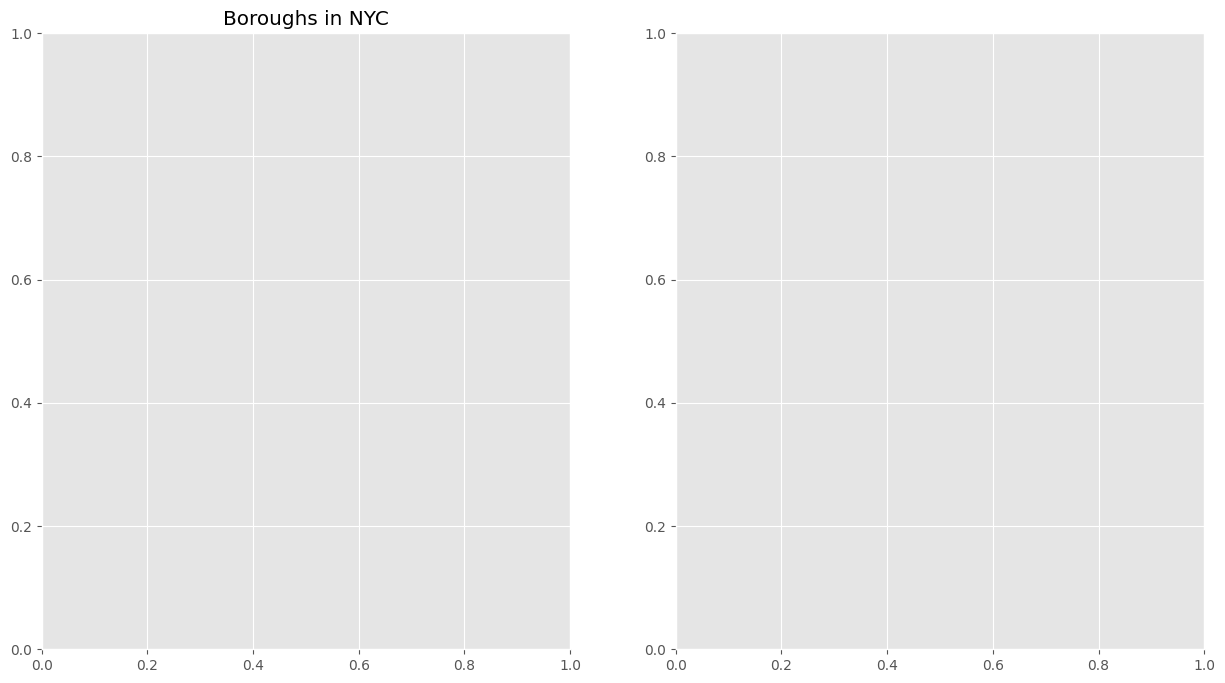

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf, test_heatmap)

In [15]:
# df
filtered = df.loc[df["tpep_pickup_datetime"].loc[lambda x: (x.dt.minute < 30) & (x.dt.hour == 8)].index, ["tpep_pickup_datetime","PULocationID"]].sort_values(by=['tpep_pickup_datetime'])
# demand = np.array(dim)
filtered

,tpep_pickup_datetime,PULocationID
67571,2019-01-01 08:00:02,170
66160,2019-01-01 08:00:02,237
66536,2019-01-01 08:00:04,48
66786,2019-01-01 08:00:05,141
68651,2019-01-01 08:00:07,90
...,...,...
14022101,2019-02-28 08:29:58,230
14026673,2019-02-28 08:29:58,141
14028485,2019-02-28 08:29:58,170
14029744,2019-02-28 08:29:59,162


# Model implementation

In [16]:
import numpy as np
import torch
from torch.autograd import Variable as V
import time
import torch.utils.data as Data
from torch import nn
from torch.nn import TransformerEncoderLayer
from torch.nn import TransformerEncoder
from torch.nn import TransformerDecoder
from torch.nn import LayerNorm
from torch.nn import BatchNorm1d
from torch.nn import Linear
import torch.nn.functional as F
from torch.nn.functional import relu
from torch.nn import Dropout
from torch.nn.init import xavier_uniform_

In [17]:
# class DemandPredictor(nn.Module):
#     def __init__(self):
#         super(DemandPredictor, self).__init__()

#     def forward(self, )

In [18]:
data = np.load("data.npy")
data.shape

(2832, 265)